## ENSEMBLE LEARNING (VOTING CLASSIFIER)

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [384]:
x,y=make_moons(n_samples=200,noise=0.1)

In [385]:
df={"x1":x[:,0],
    "x2":x[:,1],
    "y":y
    }

In [386]:
datasets=pd.DataFrame(df)


In [387]:
datasets.head(3)

,x1,x2,y
0,1.979968,0.039994,1
1,1.573445,-0.479522,1
2,0.582717,-0.395878,1


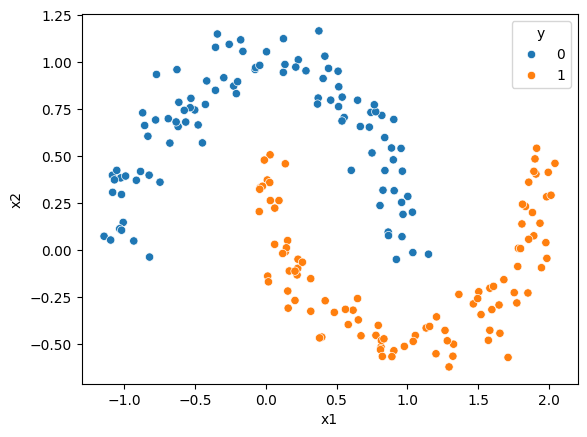

In [388]:
sns.scatterplot(x="x1",y="x2",hue="y",data=datasets)
plt.show()

In [389]:
x1=datasets.iloc[:,:-1]

y1=datasets["y"]



In [390]:
from sklearn.model_selection import train_test_split

In [391]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.2,random_state=42)

In [392]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [393]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100



(100.0, 97.5)

In [394]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100



(97.5, 98.125)

In [395]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100



(85.0, 88.125)

In [396]:
lst = [
    ("dt", DecisionTreeClassifier()), 
    ("svm", SVC()), 
    ("gnb", GaussianNB())
]

In [397]:
from sklearn.ensemble import VotingClassifier

In [398]:
vc=VotingClassifier(estimators=lst)#,weights=[8,4,7]

In [399]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('gnb', GaussianNB())])

In [400]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.5, 97.5)

In [401]:
prd={
    "dt1":dt.predict(x_test),
    "sv1":sv.predict(x_test),
    "gnb1":gnb.predict(x_test),
}

In [403]:
datasets_testingscore=pd.DataFrame(prd)

In [407]:
datasets_testingscore.head(8)

,dt1,sv1,gnb1
0,0,0,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1
5,1,0,0
6,1,0,0
7,0,0,0
